In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import classification_report

plt.style.use('fivethirtyeight')

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [34]:
df = pd.read_csv("/content/drive/MyDrive/diabetes_prediction_dataset.csv")

In [35]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [38]:
df = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)

# Split the data into features and target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9699
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000

Confusion Matrix:
 [[18225    67]
 [  535  1173]]


In [39]:
import joblib

# Save the model to a file
joblib.dump(model, 'diabetes_model.pkl')

# To load the model later:
# loaded_model = joblib.load('diabetes_model.pkl')

['diabetes_model.pkl']

In [46]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('diabetes_model.pkl')

# Define expected columns (based on training data)
expected_columns = [
    'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level',
    'gender_Male', 'gender_Other', 'smoking_history_current', 'smoking_history_ever',
    'smoking_history_former', 'smoking_history_never', 'smoking_history_not current'
]

def get_user_input():
    print("Please enter the following details:")
    gender = input("Gender (Male/Female/Other): ").strip().title()
    age = float(input("Age: "))
    hypertension = int(input("Hypertension (1 for Yes, 0 for No): "))
    heart_disease = int(input("Heart Disease (1 for Yes, 0 for No): "))
    smoking_history = input("Smoking History (never, former, current, ever, not current): ").strip().lower()
    bmi = float(input("BMI: "))
    hba1c_level = float(input("HbA1c Level: "))
    blood_glucose_level = int(input("Blood Glucose Level: "))

    # Create a dictionary from the inputs
    user_data = {
        'gender': gender,
        'age': age,
        'hypertension': hypertension,
        'heart_disease': heart_disease,
        'smoking_history': smoking_history,
        'bmi': bmi,
        'HbA1c_level': hba1c_level,
        'blood_glucose_level': blood_glucose_level
    }

    return user_data

def preprocess_user_input(user_data):
    # Convert the user input into a DataFrame
    user_df = pd.DataFrame([user_data])

    # One-hot encode categorical variables (same as during training)
    user_df = pd.get_dummies(user_df, columns=['gender', 'smoking_history'], drop_first=True)

    # Ensure all expected columns are present (add missing columns with 0s)
    for col in expected_columns:
        if col not in user_df.columns:
            user_df[col] = 0

    # Reorder columns to match the training data
    user_df = user_df[expected_columns]

    return user_df

def predict_diabetes_risk(user_data):
    # Preprocess the user input
    user_df = preprocess_user_input(user_data)

    # Make a prediction
    prediction = model.predict(user_df)
    prediction_proba = model.predict_proba(user_df)

    return prediction, prediction_proba

def main():
    # Get user input
    user_data = get_user_input()

    # Predict diabetes risk
    prediction, prediction_proba = predict_diabetes_risk(user_data)

    # Display the result
    if prediction[0] == 1:
        print("\nPrediction: You are at risk of diabetes.")
    else:
        print("\nPrediction: You are not at risk of diabetes.")

    print(f"Probability: {prediction_proba[0][1] * 100:.2f}%")

# Run the program
if __name__ == "__main__":
    main()

Please enter the following details:
Gender (Male/Female/Other): Male
Age: 45
Hypertension (1 for Yes, 0 for No): 0
Heart Disease (1 for Yes, 0 for No): 0
Smoking History (never, former, current, ever, not current): former
BMI: 28.5
HbA1c Level: 6.2
Blood Glucose Level: 140

Prediction: You are not at risk of diabetes.
Probability: 2.00%


In [41]:
def get_user_input():
    print("Please enter the following details:")
    gender = input("Gender (Male/Female/Other): ").strip().title()
    age = float(input("Age: "))
    hypertension = int(input("Hypertension (1 for Yes, 0 for No): "))
    heart_disease = int(input("Heart Disease (1 for Yes, 0 for No): "))
    smoking_history = input("Smoking History (never, former, current, no info): ").strip().lower()
    bmi = float(input("BMI: "))
    hba1c_level = float(input("HbA1c Level: "))
    blood_glucose_level = int(input("Blood Glucose Level: "))

    # Create a dictionary from the inputs
    user_data = {
        'gender': gender,
        'age': age,
        'hypertension': hypertension,
        'heart_disease': heart_disease,
        'smoking_history': smoking_history,
        'bmi': bmi,
        'HbA1c_level': hba1c_level,
        'blood_glucose_level': blood_glucose_level
    }

    return user_data

In [42]:
import pandas as pd

def preprocess_user_input(user_data):
    # Convert the user input into a DataFrame
    user_df = pd.DataFrame([user_data])

    # One-hot encode categorical variables (same as during training)
    user_df = pd.get_dummies(user_df, columns=['gender', 'smoking_history'], drop_first=True)

    # Ensure all columns are present (in case some categories are missing in user input)
    # Add missing columns with 0s
    expected_columns = [
        'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level',
        'gender_Male', 'gender_Other', 'smoking_history_current', 'smoking_history_former',
        'smoking_history_never', 'smoking_history_no info'
    ]
    for col in expected_columns:
        if col not in user_df.columns:
            user_df[col] = 0

    # Reorder columns to match the training data
    user_df = user_df[expected_columns]

    return user_df

In [43]:
def predict_diabetes_risk(user_data):
    # Preprocess the user input
    user_df = preprocess_user_input(user_data)

    # Make a prediction
    prediction = model.predict(user_df)
    prediction_proba = model.predict_proba(user_df)

    return prediction, prediction_proba

In [45]:
def main():
    # Get user input
    user_data = get_user_input()

    # Predict diabetes risk
    prediction, prediction_proba = predict_diabetes_risk(user_data)

    # Display the result
    if prediction[0] == 1:
        print("\nPrediction: You are at risk of diabetes.")
    else:
        print("\nPrediction: You are not at risk of diabetes.")

    print(f"Probability: {prediction_proba[0][1] * 100:.2f}%")

# Run the program
if __name__ == "__main__":
    main()

Please enter the following details:
Gender (Male/Female/Other): Male
Age: 45
Hypertension (1 for Yes, 0 for No): 0
Heart Disease (1 for Yes, 0 for No): 0
Smoking History (never, former, current, no info): former
BMI: 28.5
HbA1c Level: 6.2
Blood Glucose Level: 140


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- smoking_history_no info
Feature names seen at fit time, yet now missing:
- smoking_history_ever
- smoking_history_not current


In [13]:
df.corr()

,gender,age,height
gender,1.000000,0.447214,-0.832050
age,0.447214,1.000000,-0.372104
height,-0.832050,-0.372104,1.000000


<Axes: >

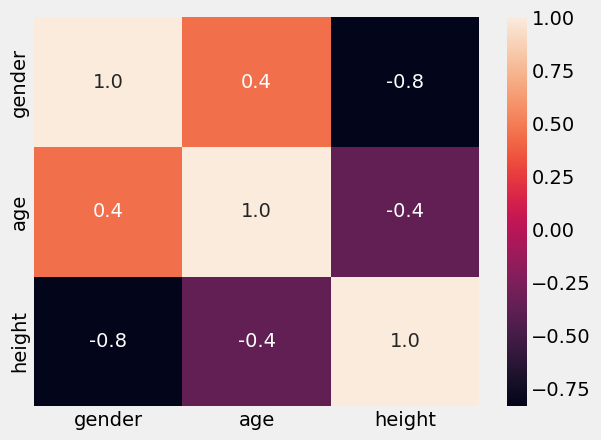

In [14]:
sns.heatmap(df.corr(),annot=True,fmt='0.1f')

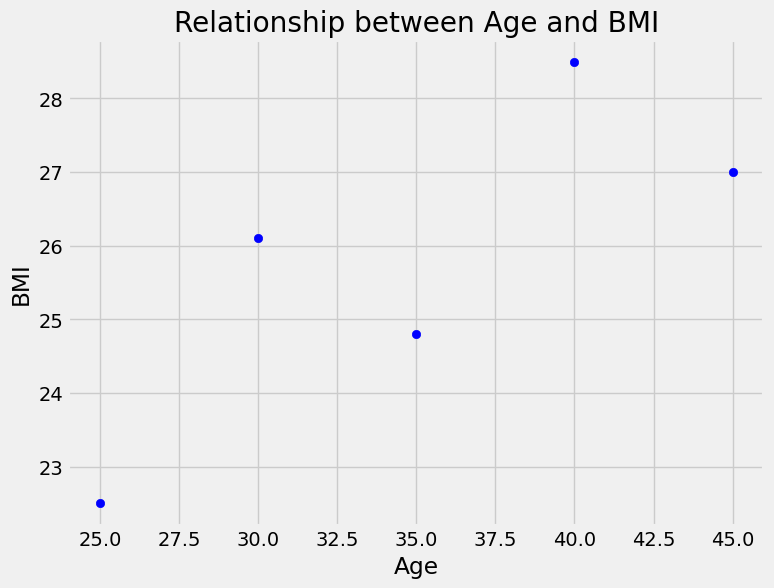

In [15]:
age = [25, 30, 35, 40, 45]
bmi = [22.5, 26.1, 24.8, 28.5, 27.0]
plt.figure(figsize=(8, 6))
plt.scatter(age, bmi, color='blue', marker='o')
plt.title('Relationship between Age and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.grid(True)
plt.show()


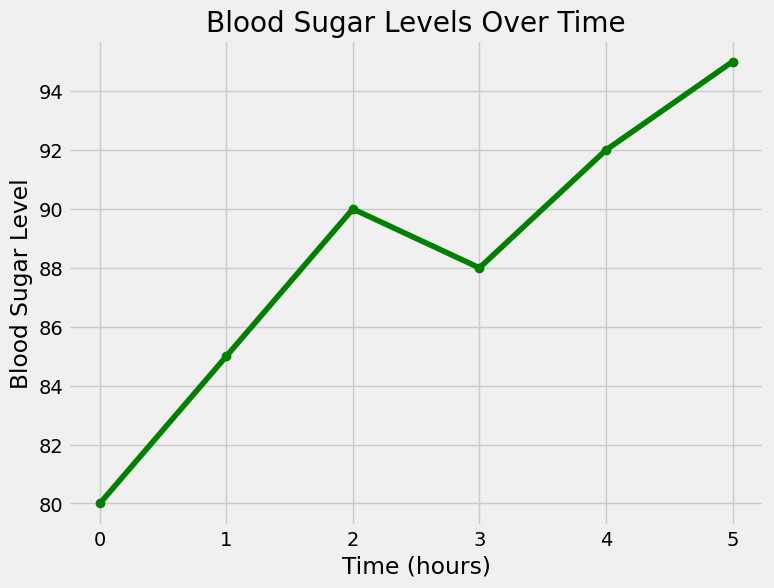

In [16]:
time = [0, 1, 2, 3, 4, 5]
blood_sugar = [80, 85, 90, 88, 92, 95]
plt.figure(figsize=(8, 6))
plt.plot(time, blood_sugar, color='green', marker='o', linestyle='-')
plt.title('Blood Sugar Levels Over Time')
plt.xlabel('Time (hours)')
plt.ylabel('Blood Sugar Level')
plt.grid(True)
plt.show()


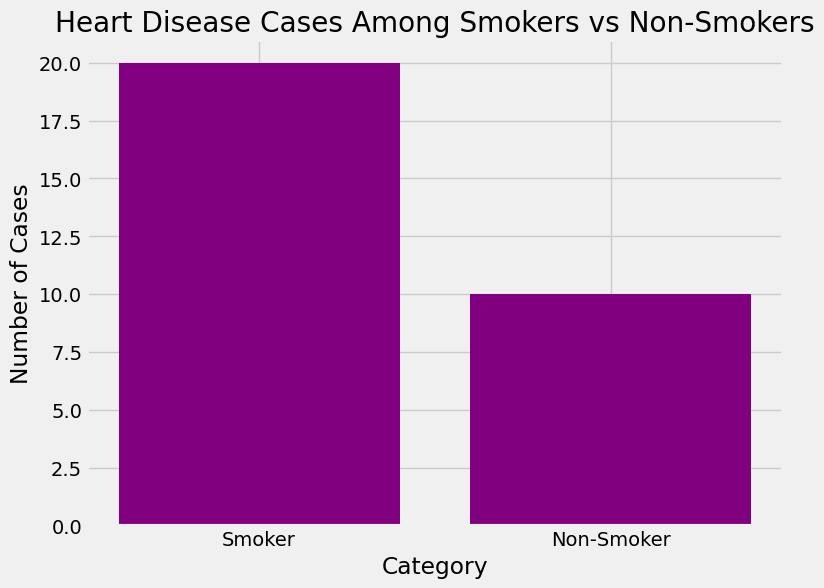

In [17]:
categories = ['Smoker', 'Non-Smoker']
heart_disease_cases = [20, 10]
plt.figure(figsize=(8, 6))
plt.bar(categories, heart_disease_cases, color='purple')
plt.title('Heart Disease Cases Among Smokers vs Non-Smokers')
plt.xlabel('Category')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()

<Axes: >

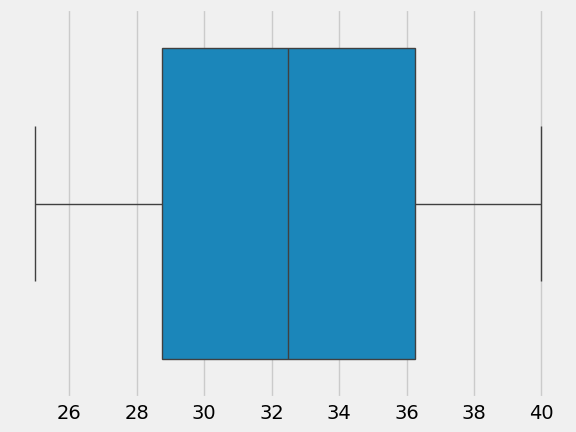

In [18]:
sns.boxplot(x=data['age'])

In [19]:
df.columns

Index(['gender', 'age', 'height'], dtype='object')

In [20]:
df.isnull().sum()




,0
gender,0
age,0
height,0


In [21]:
df['gender'].value_counts()

,count
gender,
0,2
1,2


In [22]:
X = df[['gender', 'age', 'height']]
y = df['height']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
 model.score(X_test,y_test)

0.0

In [26]:
 model.score(X_train, y_train)

1.0

In [27]:
y_pred = model.predict(X_test)

In [28]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[0 1]
 [0 0]]


In [29]:

labels = np.unique(y_test)
print("Available labels:", labels)


pos_label = labels[0]

print('Recall:', recall_score(y_test, y_pred, pos_label=pos_label))


Available labels: [165]
Recall: 0.0


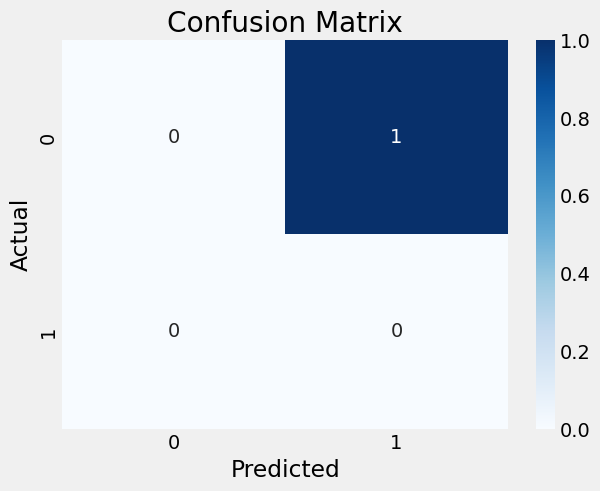

In [30]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [31]:
import pickle
with open("logistic_regression.pkl", "wb") as f:
    pickle.dump(model, f)
